# Exploratory Analyses

- Import the clean data

In [1]:
import pandas as pd
import numpy as np

In [2]:
rent_feature = pd.read_csv('rent_feature.csv')

In [3]:
rent_feature.columns

Index(['Unnamed: 0', 'City', 'Neighborhood', 'Studio', '1BR', '2BR', 'Budget',
       'Locations', '0_l-1', '0_l-2', '0_l-3', 'dem-1', 'dem-2', 'dem-3',
       'dem-4', 'dem-5', 'dem-6', 'dem-7', 'dem-8', 'dem-9', 'dem-10', 'eng-1',
       'eng-2', 'eng-3', 'eng-4', 'env-1', 'env-2', 'env-3', 'env-4', 'hea-1',
       'hea-2', 'hea-3', 'hea-4', 'hea-5', 'liv-1', 'liv-2', 'liv-3', 'liv-4',
       'liv-5', 'liv-6', 'liv-7', 'nei-1', 'nei-2', 'nei-3', 'nei-4', 'nei-5',
       'nei-6', 'nei-7', 'nei-8', 'nei-9', 'opp-1', 'opp-2', 'opp-3', 'opp-4',
       'tra-1', 'tra-2', 'tra-3', 'tra-4', 'tra-5', 'tra-6', 'tra-7'],
      dtype='object')

- create name lists of feature subsets by category to convenient further analyses

In [4]:
rents = ['Studio', '1BR', '2BR']
livability = [f'liv-{i}' for i in range(1, 8)]
demographics = [f'dem-{i}' for i in range(1, 11)]
engagements = [f'eng-{i}' for i in range(1, 5)]
environments = [f'env-{i}' for i in range(1, 5)]
health = [f'hea-{i}' for i in range(1, 6)]
neighborhood = [f'nei-{i}' for i in range(1, 10)]
opportunity = [f'opp-{i}' for i in range(1, 5)]
transportation = [f'tra-{i}' for i in range(1, 8)]

## Descriptive statistics and visualizations

In [13]:
# rent_feature.describe

In [6]:
city_mean = rent_feature.groupby('City').mean()
# city_mean.reset_index(level=0, inplace=True)

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = [16, 9]

In [34]:
city_mean[rents[1]]

City
Boston, MA               2479.513514
Chicago, IL              1604.400000
Dallas-Fort Worth, TX    1373.058824
Los Angeles, CA          2083.550000
Miami, FL                1533.000000
New York, NY             2965.862069
Name: 1BR, dtype: float64

In [70]:
# X = np.arange(5)
# labels = city_mean[rents].index

# fig = plt.figure()
# ax = plt.axes()

# ax.bar(city_mean[rents[0]].values)
# # ax.bar(X + 0.20, city_mean[rents[1]].values, width = 0.20)
# ax.plot(city_mean[rents[1]])

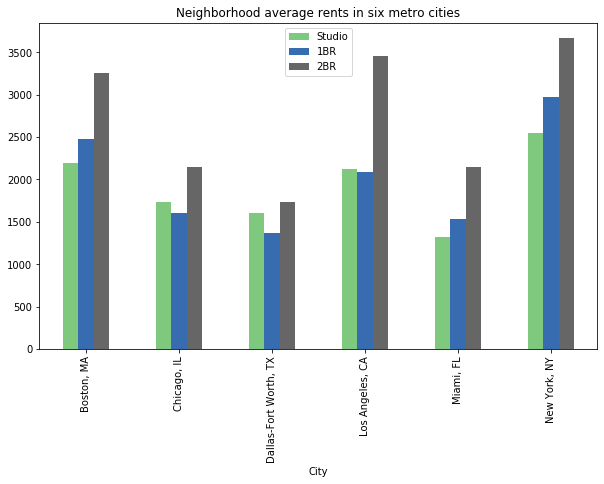

In [207]:
city_mean[rents].plot.bar(colormap='Accent')
_ = plt.title('Neighborhood average rents in six metro cities')

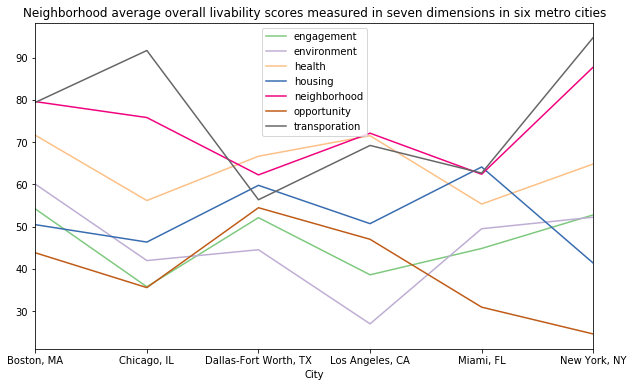

In [208]:
city_mean[livability].plot(colormap='Accent')
plt.legend(['engagement', 'environment', 'health', 'housing', 'neighborhood', 'opportunity', 'transporation'])
_ = plt.title('Neighborhood average overall livability scores measured in seven dimensions in six metro cities')

From the above two figures, we observed that two aspects, housing and opportunity, did not follow the rent price pattern. The other five aspects, engagement, environment, health, neighborhood, and transportation, may associate with some differences among the six cities.

- Narrow the scope: reduce the number of features that may have correlations with average neighborhood rents

In this series of analyses, I took the rental prices of 1-bedroom apartment as the dependent variable. (There are too many missing values for the prices of studios and two-bedroom apartment, and such small samples will affect the prediction accuracies.)

1. Overall livability ratings: 

liv-1 -- social engagement;
liv-2 -- physical environment;
liv-3 -- health service; 
liv-4 -- housing; 
liv-5 -- neighborhood environment; 
liv-6 -- opportunity; 
liv-7 -- transportation

Note: I removed the overall ratings of housing because it partly described the housing prices that may be a covariate.

In [75]:
liv = rent_feature[['1BR'] + livability]

In [133]:
liv.head()

,1BR,liv-1,liv-2,liv-3,liv-4,liv-5,liv-6,liv-7
0,1875,57,61,70,50,78,23,87
1,2850,48,66,81,43,82,35,97
2,2675,52,48,78,41,74,30,84
3,3900,54,64,77,64,77,22,98
4,2395,52,48,83,43,85,37,99


In [256]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

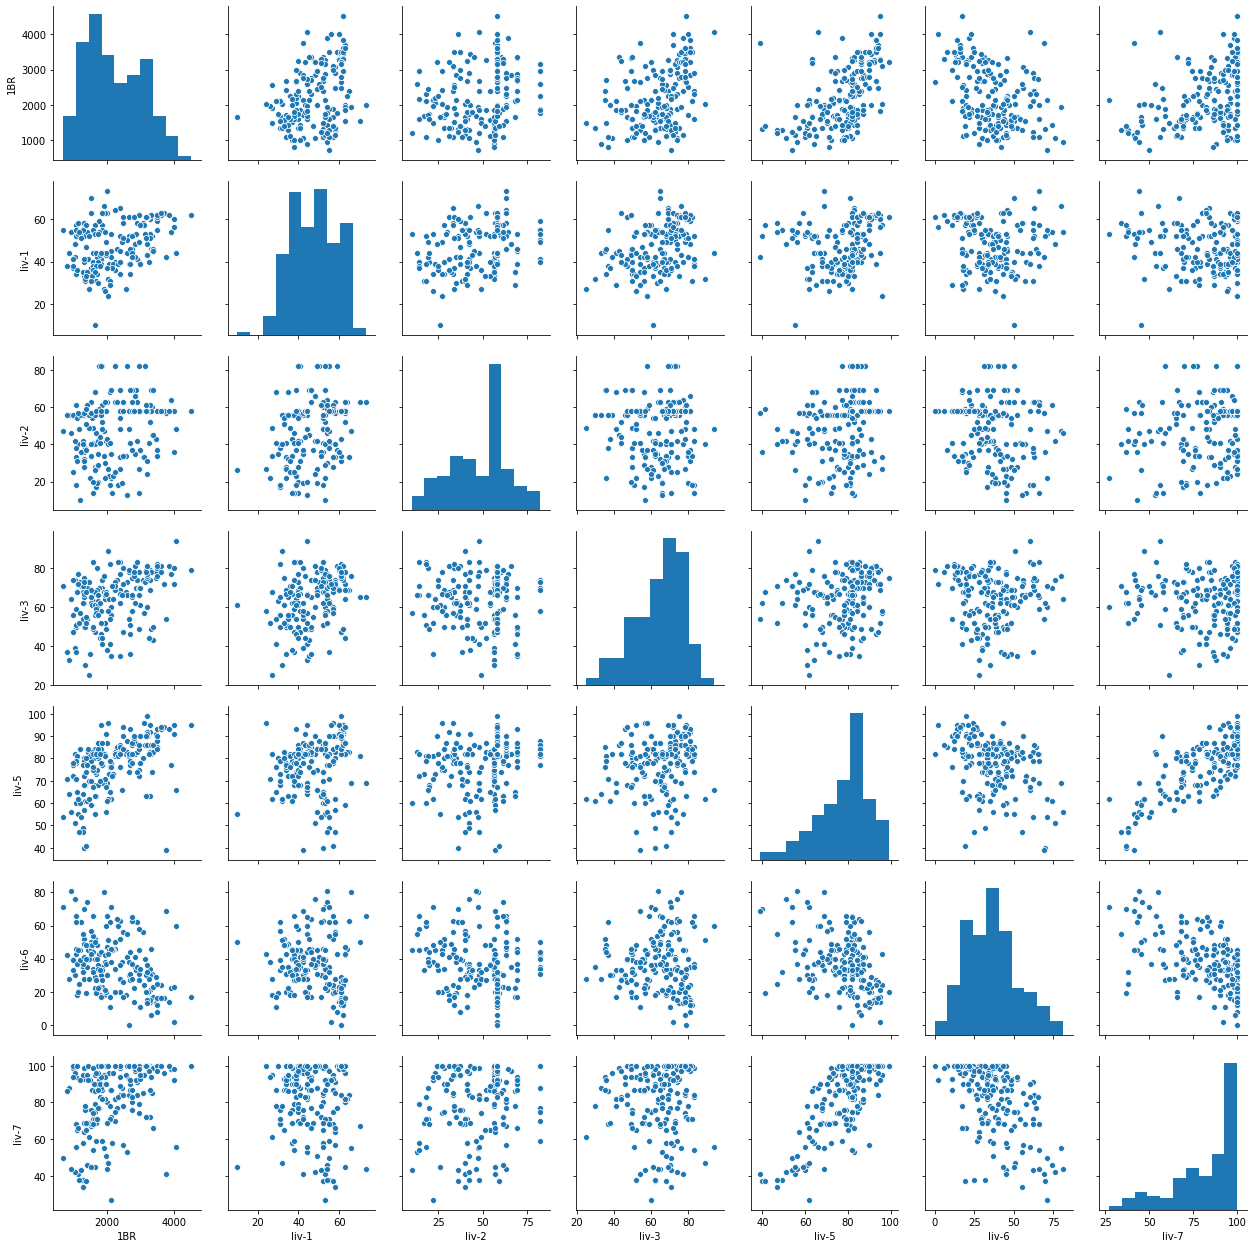

In [20]:
sns.pairplot(liv)

2. Detailed feature distributions in each category

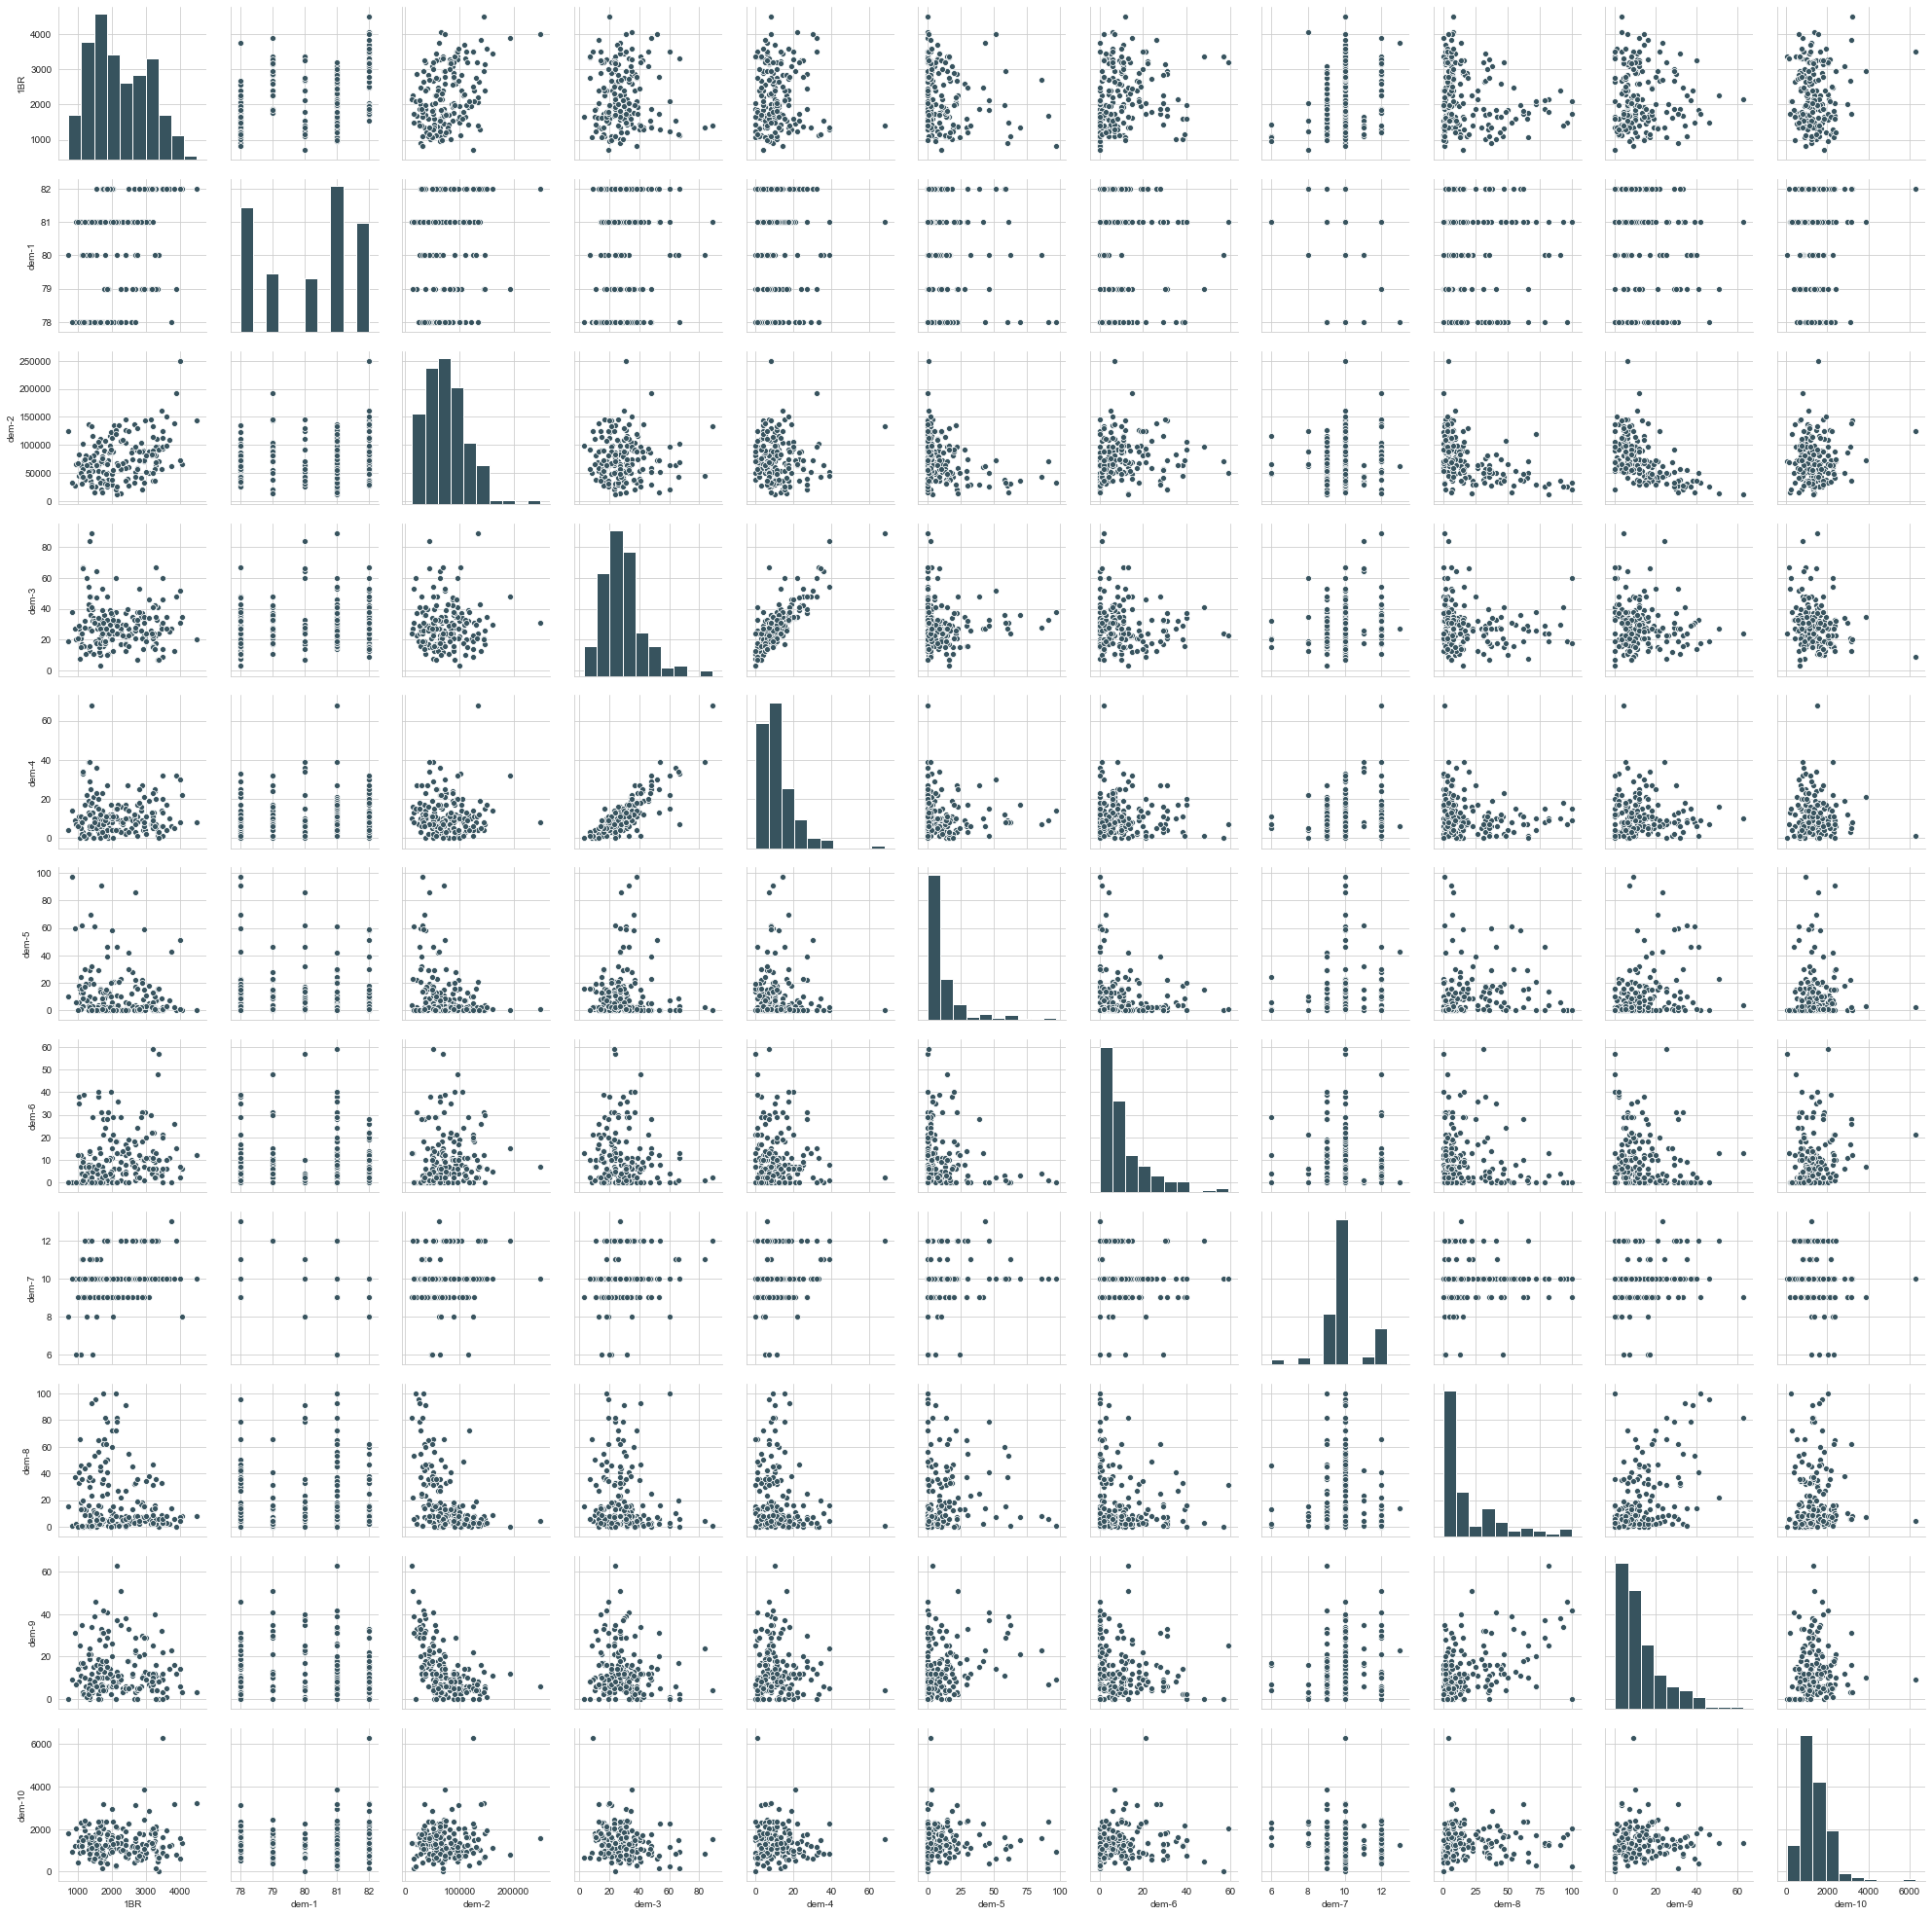

In [258]:
sns.pairplot(rent_feature[['1BR'] + demographics])

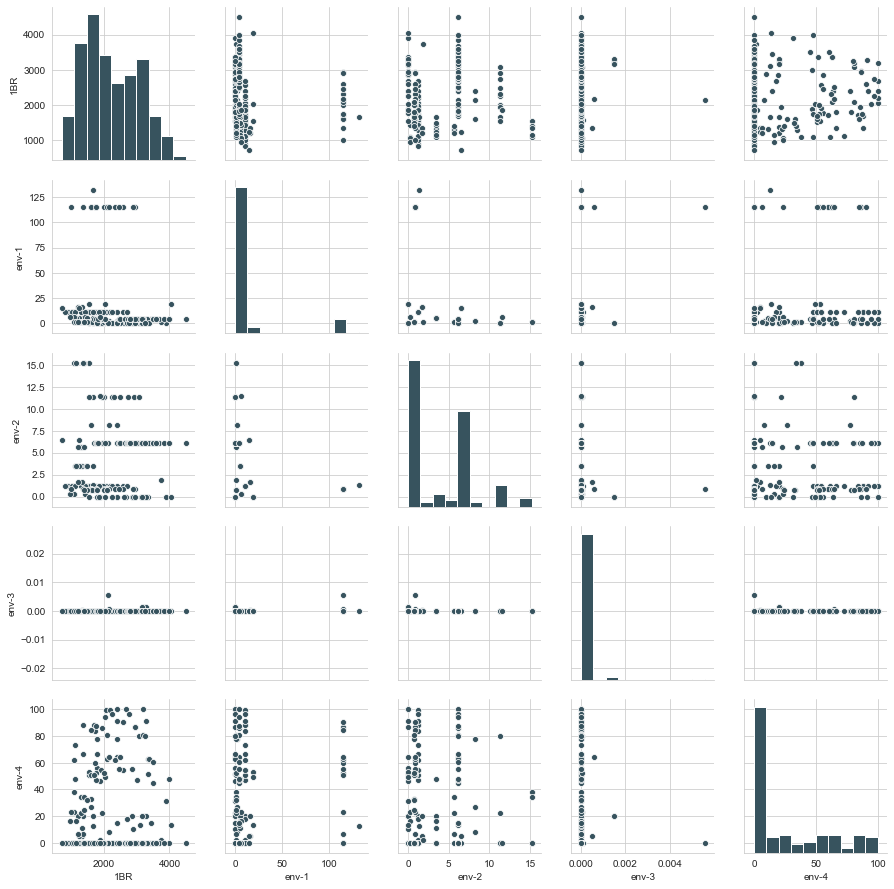

In [260]:
sns.pairplot(rent_feature[['1BR'] + environments])

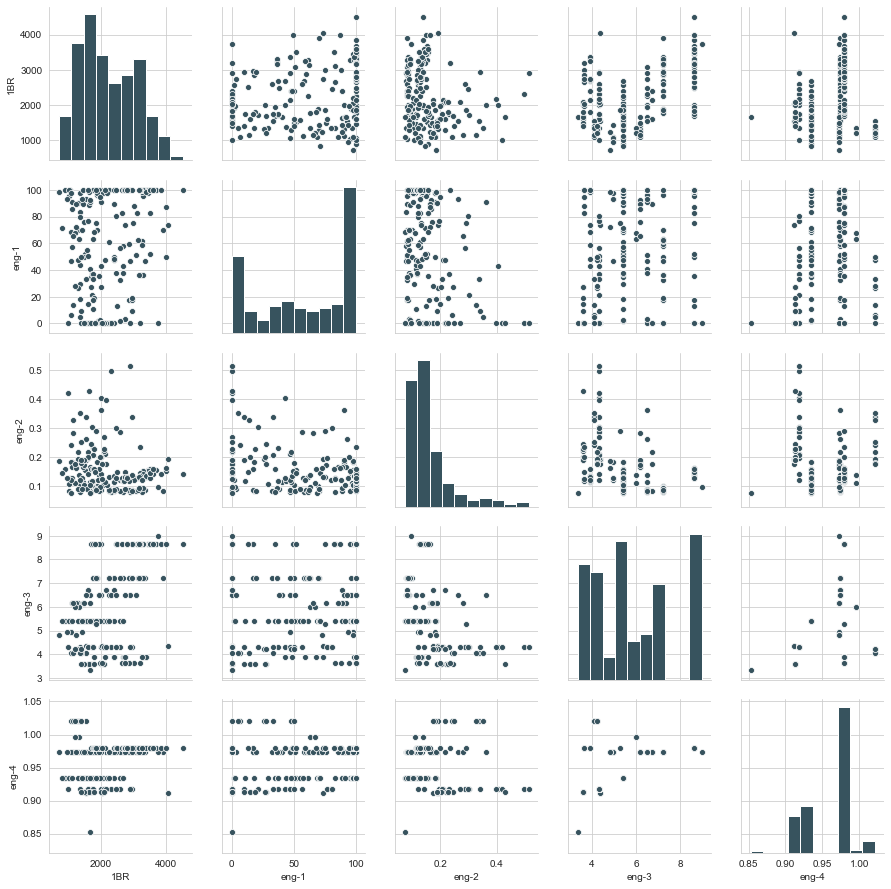

In [265]:
sns.pairplot(rent_feature[['1BR'] + engagements])

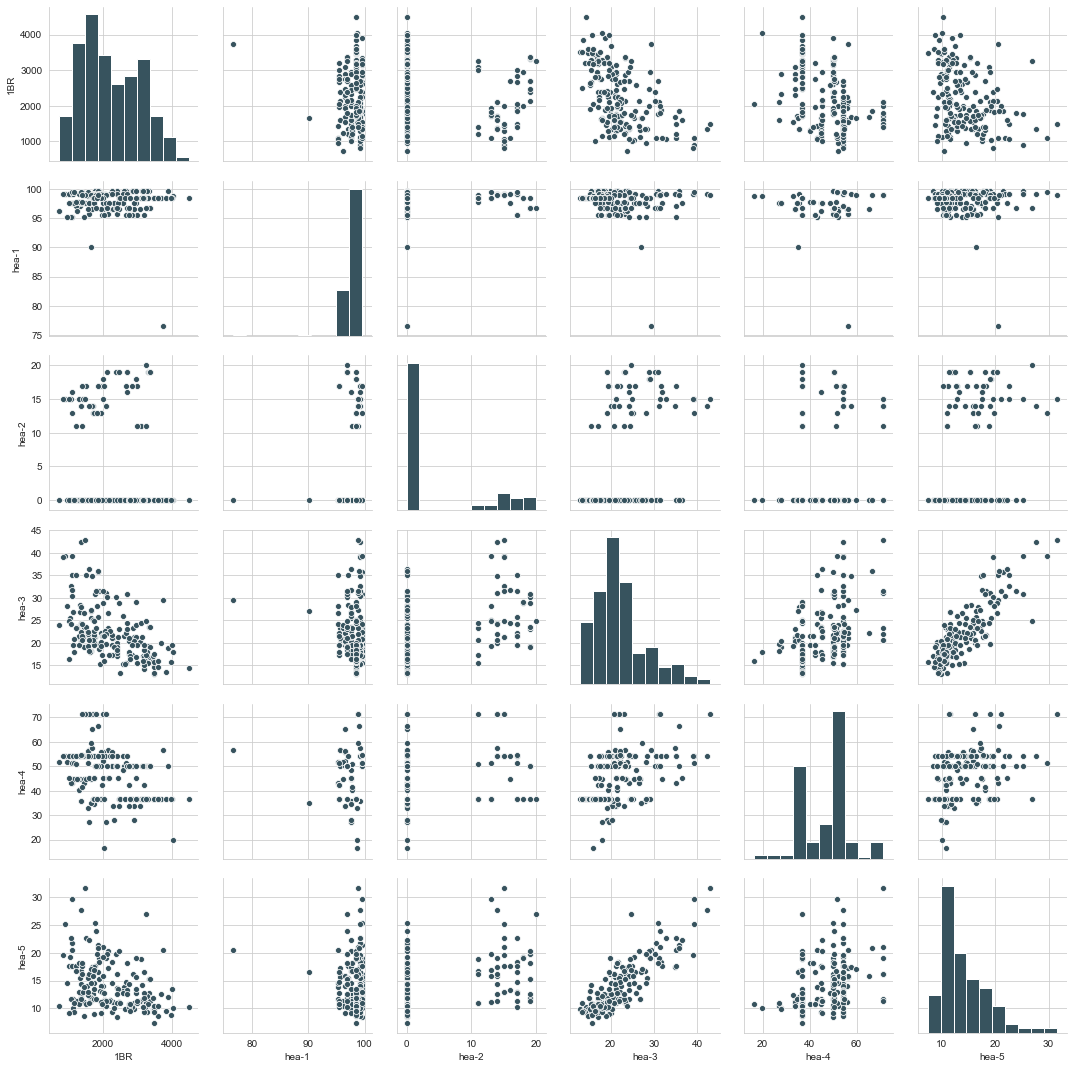

In [266]:
sns.pairplot(rent_feature[['1BR'] + health])

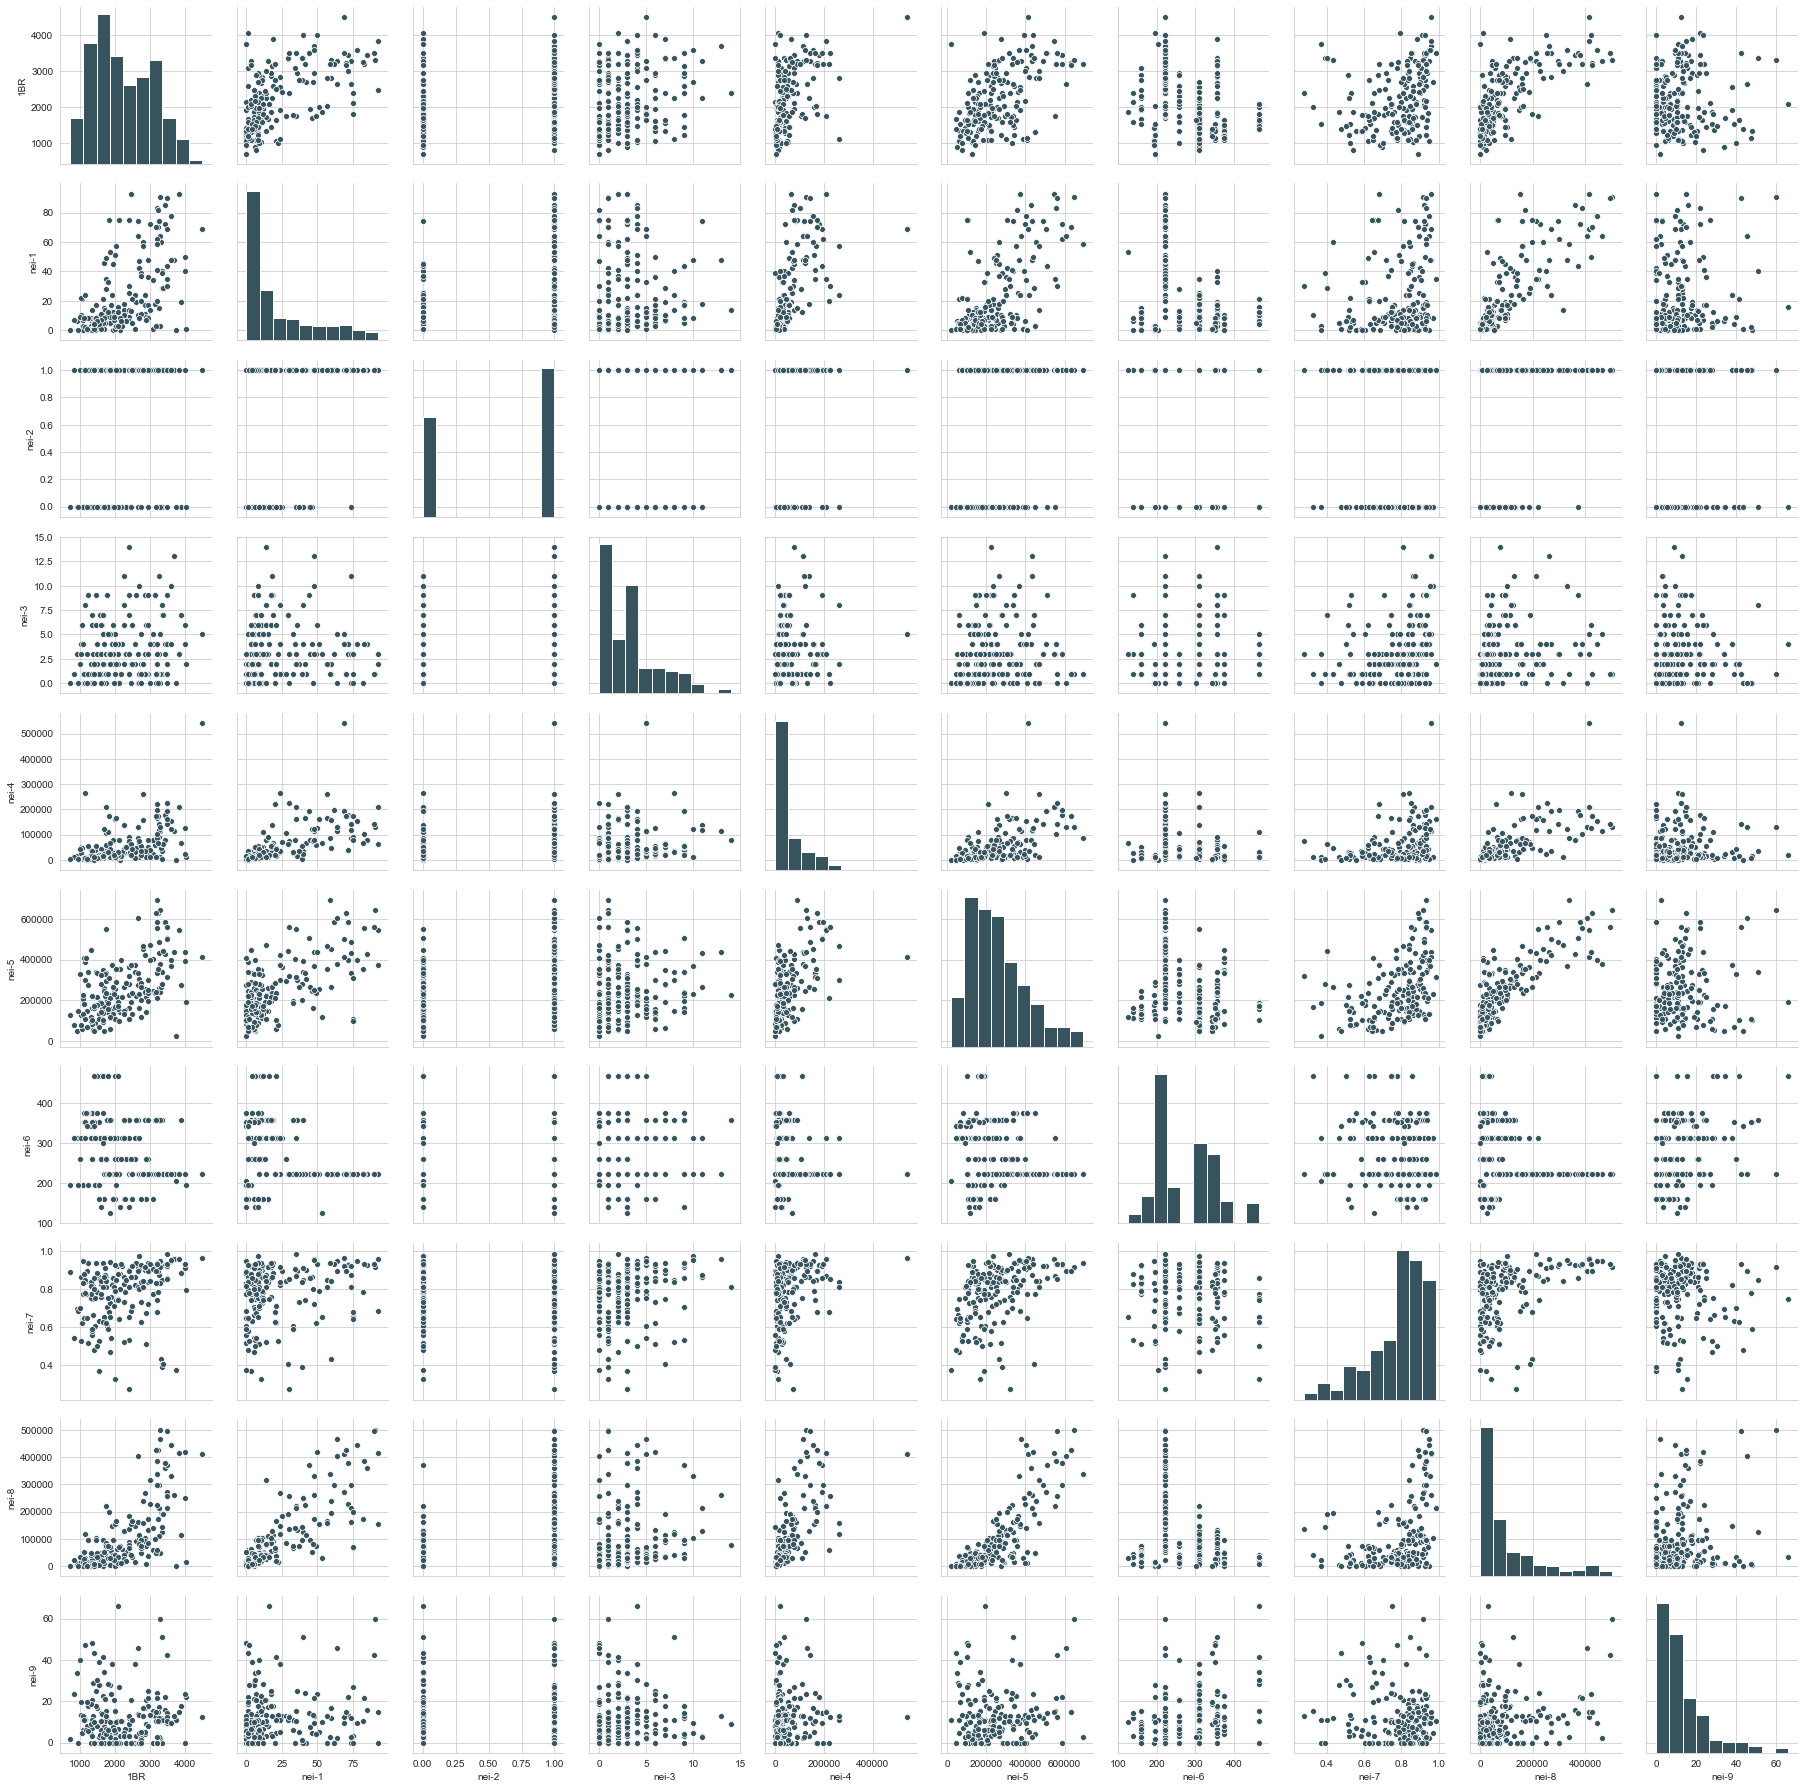

In [267]:
sns.pairplot(rent_feature[['1BR'] + neighborhood])

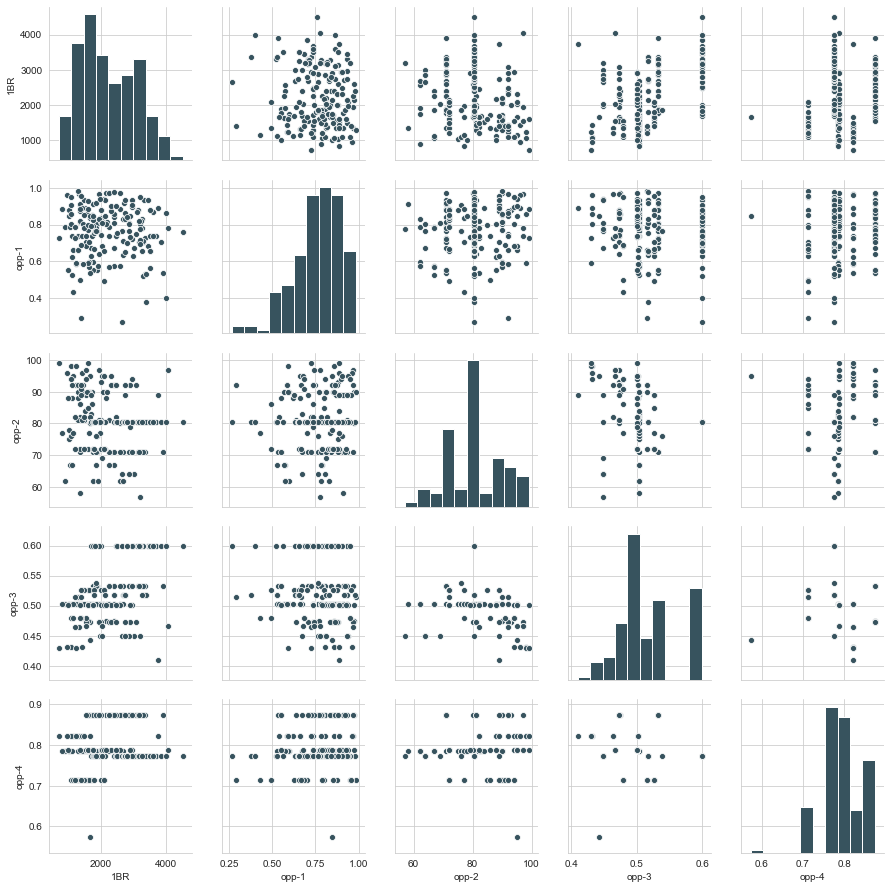

In [268]:
sns.pairplot(rent_feature[['1BR'] + opportunity])

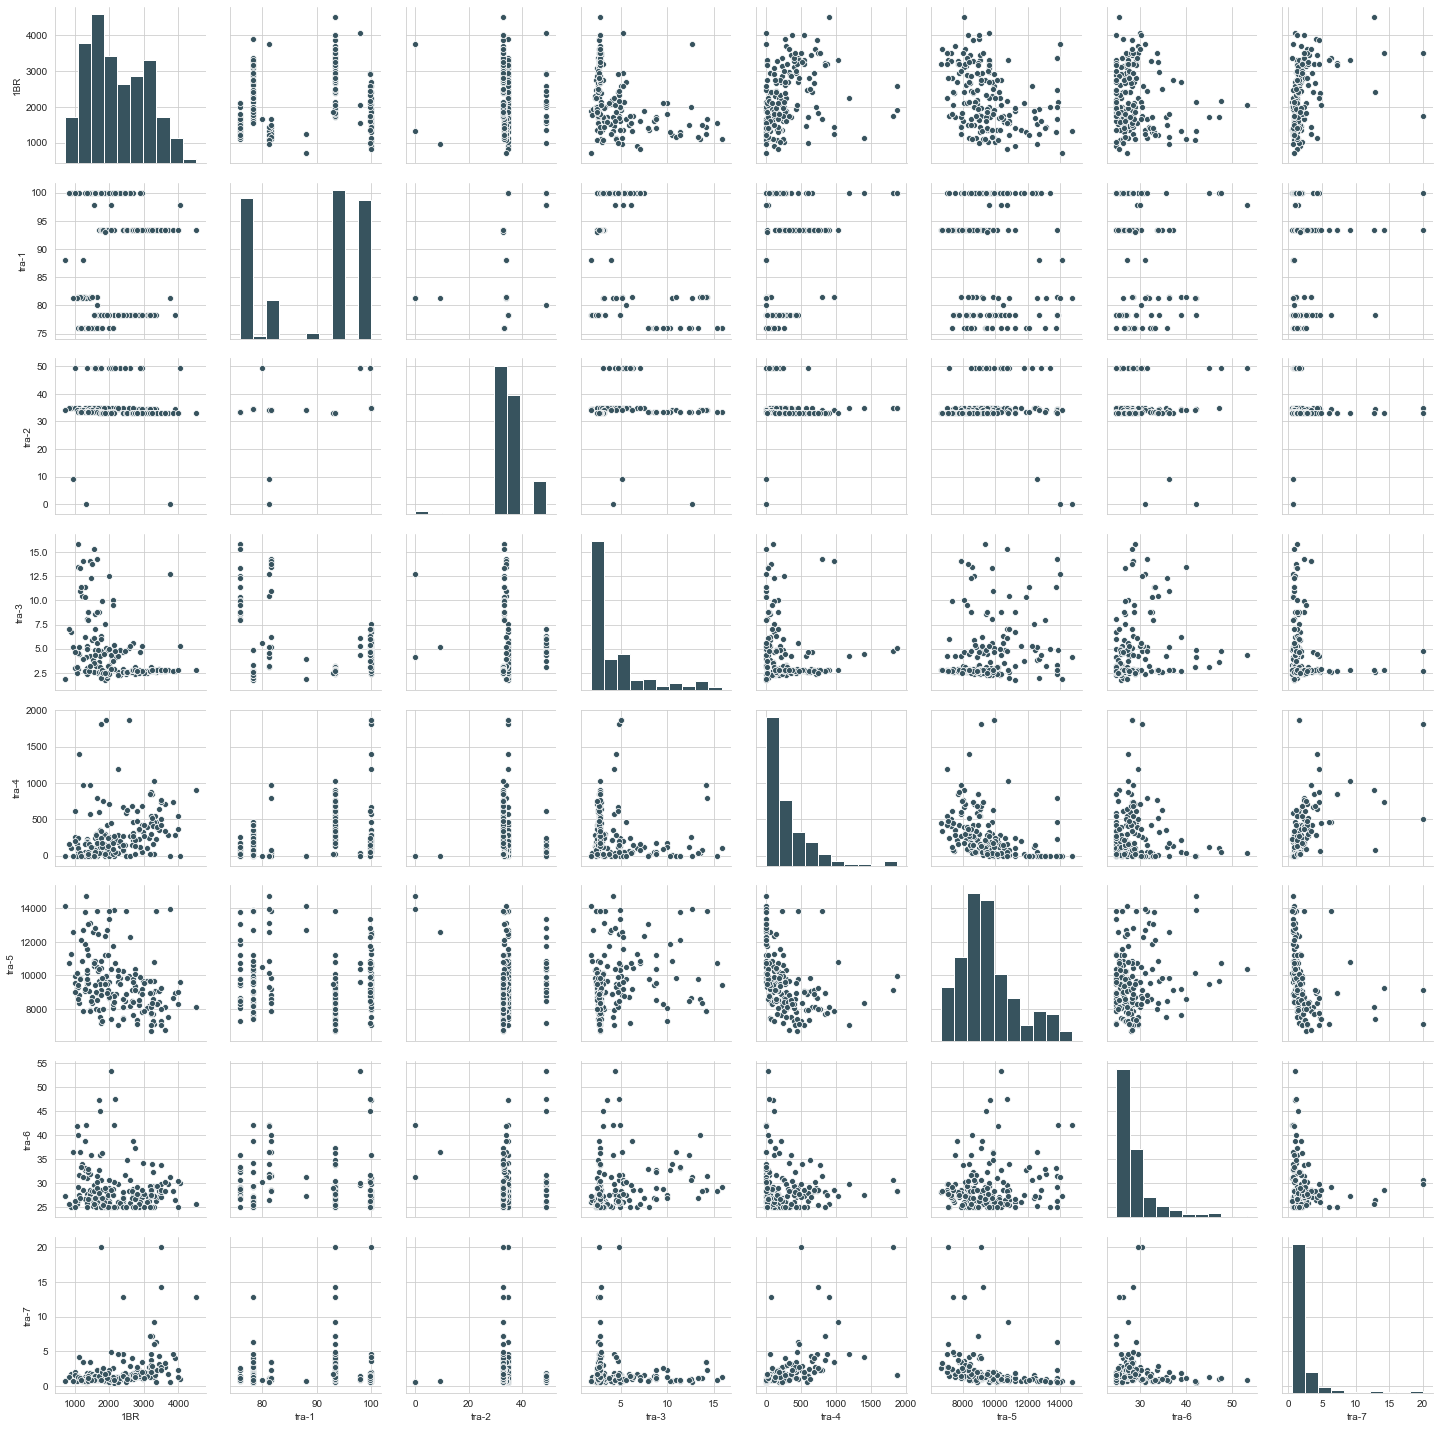

In [269]:
sns.pairplot(rent_feature[['1BR'] + transportation])

## Prediction Models

### 1. Linear regression for predictior group 1: overall livability ratings

I observed some plausible linear trends from above pairplots. Therefore the first testing model could be a linear regression when using overall livability socres containing six aspects to predict rental prices.

In [76]:
# create subset: overall livability
y = liv['1BR']
X = liv.drop('1BR', axis=1)

In [302]:
from sklearn.model_selection import train_test_split

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [304]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [305]:
lm = LinearRegression()

In [306]:
lm.fit(X_train, y_train)
print(f'Coefficient:\n{lm.coef_}')

Coefficient: 
 [16.57121082  1.69862299 17.19496971 19.28292384 -9.0177958   5.42745509]


- Evaluate the model

In [308]:
predictions = lm.predict(X_train)
r2_score(y_train, predictions, multioutput='variance_weighted')

0.4545538827559527

In [143]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 496.96379498590113
MSE: 345461.7080673149
RMSE: 587.7599068219224


In [333]:
# sns.regplot(y_test, predictions)

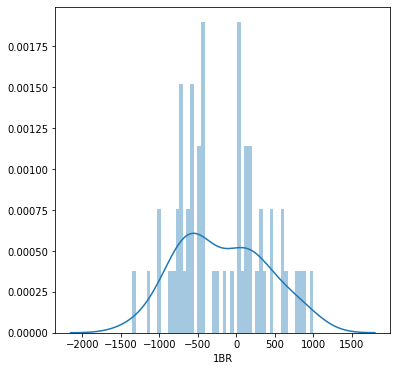

In [144]:
plt.rcParams['figure.figsize'] = [6, 6]
# Residuals
sns.distplot((y_test-predictions),bins=50);

[Text(0, 0.5, 'Predicted rents'), Text(0.5, 0, 'True rents')]

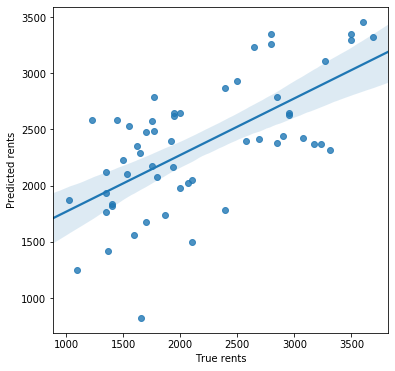

In [145]:
fig = sns.regplot(x=y_test, y = predictions)
fig.set(xlabel = 'True rents', ylabel= 'Predicted rents')

The results from linear regression had a high bias with a low R-square.

- Correlations between overall livability scores and average rents

In [73]:
import statsmodels.api as sm
from scipy import stats

In [83]:
y = liv['1BR']
# X = liv.drop(['1BR', 'liv-4'], axis=1)
X = liv.drop(['1BR'], axis=1)

In [84]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    1BR   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     20.66
Date:                Mon, 15 Jun 2020   Prob (F-statistic):           3.63e-20
Time:                        16:47:15   Log-Likelihood:                -1452.0
No. Observations:                 185   AIC:                             2920.
Df Residuals:                     177   BIC:                             2946.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -291.4792    552.872     -0.527      0.5

### 2. Random Forest

In [86]:
from sklearn.model_selection import train_test_split

In [159]:
# Model-1: using livability overall scores for prediction
X = liv.drop('1BR', axis=1)
y = liv['1BR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [172]:
# Model-2: using all detailed features of the six aspects and demogrphics for prediction
X = rent_feature[demographics + engagements + environments + health + neighborhood + opportunity + transportation]
y = rent_feature['1BR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [237]:
# # Model-3: using all detailed features of the six aspects and demogrphics for prediction
# X = rent_feature[engagements + neighborhood + transportation]
# y = rent_feature['1BR']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

- Fit data to a single decision tree to test the performance

In [173]:
from sklearn.tree import DecisionTreeRegressor

In [161]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
predictions = dtr.predict(X_test)

In [162]:
errors = abs(predictions - y_test)
print('Decision Tree - Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Decision Tree - Mean Absolute Error: 514.95 degrees.


- Determine Performance Metrics
To put our predictions in perspective, we can calculate an accuracy using the mean average percentage error subtracted from 100 %.

In [163]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Decision Tree - Accuracy:', round(accuracy, 2), '%.')

Decision Tree - Accuracy: 75.22 %.


- Random Forest with full features

In [174]:
from sklearn.ensemble import RandomForestRegressor

In [175]:
rfr = RandomForestRegressor(n_estimators=100, oob_score = True)
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

- Model evaluation with full features

In [176]:
predictions = rfr.predict(X_test)

In [113]:
X.columns

Index(['dem-1', 'dem-2', 'dem-3', 'dem-4', 'dem-5', 'dem-6', 'dem-7', 'dem-8',
       'dem-9', 'dem-10', 'eng-1', 'eng-2', 'eng-3', 'eng-4', 'env-1', 'env-2',
       'env-3', 'env-4', 'hea-1', 'hea-2', 'hea-3', 'hea-4', 'hea-5', 'nei-1',
       'nei-2', 'nei-3', 'nei-4', 'nei-5', 'nei-6', 'nei-7', 'nei-8', 'nei-9',
       'opp-1', 'opp-2', 'opp-3', 'opp-4', 'tra-1', 'tra-2', 'tra-3', 'tra-4',
       'tra-5', 'tra-6', 'tra-7'],
      dtype='object')

In [177]:
# print out the importance of each category
importances = rfr.feature_importances_
# print([rfr.feature_importances_] + [X.columns])

In [181]:
std = np.std([tree.feature_importances_ for tree in rfr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [178]:
# print the feature list
# pd.DataFrame(list(X.columns))

,0
0,dem-1
1,dem-2
2,dem-3
3,dem-4
4,dem-5
5,dem-6
6,dem-7
7,dem-8
8,dem-9
9,dem-10


In [182]:
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 30 (0.333508)
2. feature 12 (0.094754)
3. feature 38 (0.070396)
4. feature 14 (0.039264)
5. feature 21 (0.035896)
6. feature 20 (0.030768)
7. feature 23 (0.026240)
8. feature 13 (0.023437)
9. feature 27 (0.023345)
10. feature 37 (0.022798)
11. feature 29 (0.019997)
12. feature 17 (0.019982)
13. feature 10 (0.019474)
14. feature 34 (0.017753)
15. feature 1 (0.016933)
16. feature 5 (0.013392)
17. feature 9 (0.013258)
18. feature 0 (0.012954)
19. feature 28 (0.012657)
20. feature 11 (0.011701)
21. feature 26 (0.011299)
22. feature 22 (0.010840)
23. feature 7 (0.010483)
24. feature 2 (0.009955)
25. feature 3 (0.009823)
26. feature 39 (0.009361)
27. feature 31 (0.009341)
28. feature 25 (0.008183)
29. feature 41 (0.007958)
30. feature 33 (0.007551)
31. feature 40 (0.007429)
32. feature 32 (0.006794)
33. feature 42 (0.006089)
34. feature 35 (0.004637)
35. feature 8 (0.004429)
36. feature 18 (0.003947)
37. feature 4 (0.003727)
38. feature 15 (0.002745)
39. feature 3

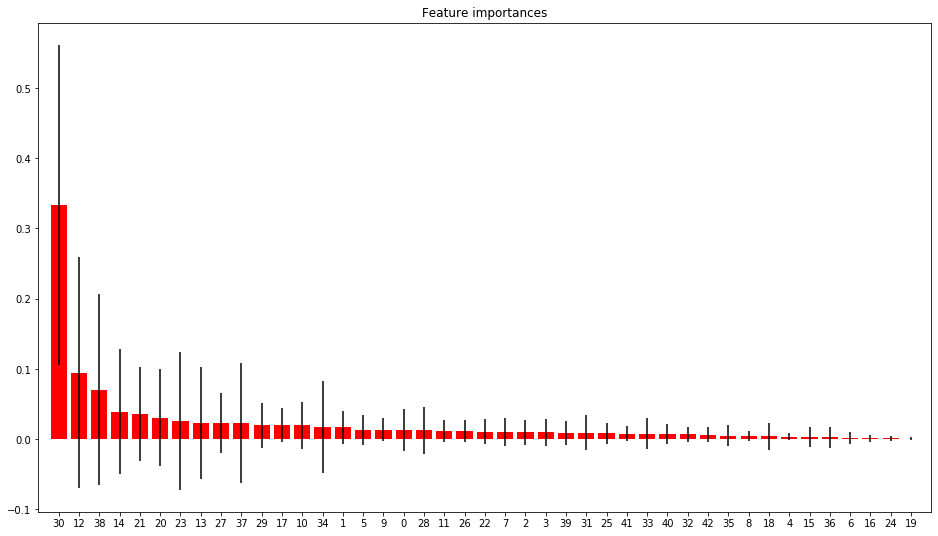

In [183]:
# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

The most important feature was nei-8 (transit accessibility),

In [184]:
print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rfr.score(X_train, y_train), 
                                                                                             rfr.oob_score_,
                                                                                             rfr.score(X_test, y_test)))

R^2 Training Score: 0.94 
OOB Score: 0.61 
R^2 Validation Score: 0.68


In [185]:
errors = abs(predictions - y_test)
print('Random Forest (full) - Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Random Forest (full) - Mean Absolute Error: 315.79 degrees.


- Determine Performance Metrics
To put our predictions in perspective, we can calculate an accuracy using the mean average percentage error subtracted from 100 %.

In [186]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Random Forest (full) - Accuracy:', round(accuracy, 2), '%.')

Random Forest (full) - Accuracy: 83.65 %.


- Feature selection for random forest model

Because features that were selected at the top of the trees were in general had larger effects than features that were selected at the end nodes of the trees, as generally the top splits led to bigger information gains, I used sklearn.feature_selection package to reduce the number of features and to highlight the features with salient effects on the predicted variable from 43 features.

In [187]:
from sklearn.feature_selection import SelectFromModel

In [188]:
sel = SelectFromModel(RandomForestRegressor(n_estimators=100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                                max_depth=None,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=100, n_jobs=None,
                                                oob_score=False,
                                                random_state=None, verbose=0,
                                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, th

In [189]:
# print the balloon values for each feature
sel.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True,  True, False, False, False, False])

In [190]:
# reduce the features to 8
selected_features = X_train.columns[(sel.get_support())]
len(selected_features)

7

In [191]:
selected_features

Index(['eng-3', 'eng-4', 'env-1', 'hea-4', 'nei-8', 'tra-2', 'tra-3'], dtype='object')

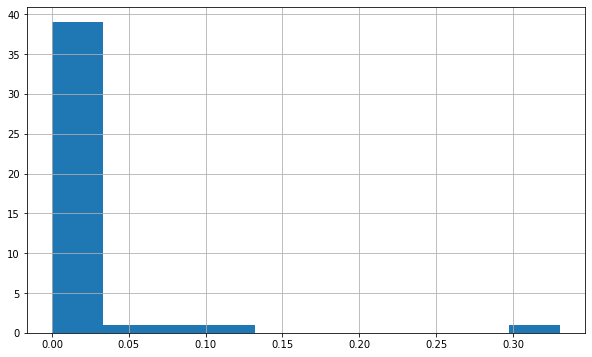

In [192]:
# check the distribution of importance
plt.rcParams['figure.figsize'] = [10, 6]
pd.Series(sel.estimator_.feature_importances_.ravel()).hist()

- Using the select features to reconstruct the model

In [193]:
# Model-3: using limited number of features
X = rent_feature[selected_features]
y = rent_feature['1BR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [194]:
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [195]:
predictions = rfr.predict(X_test)

In [291]:
errors = abs(predictions - y_test)
print('Random Forest (reduced) - Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 321.05 degrees.


- Determine Performance Metrics
To put our predictions in perspective, we can calculate an accuracy using the mean average percentage error subtracted from 100 %.

In [196]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Random Forest (reduced) - Accuracy:', round(accuracy, 2), '%.')

Random Forest (reduced) - Accuracy: 83.65 %.


- Visualizing a Single Decision Tree

In [163]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [116]:
feature_list = list(selected_features)

In [117]:
# Pull out one tree from the forest
tree = rfc.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [118]:
# Limit depth of tree to 3 levels
rfc_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rfc_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rfc_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png')

### 3. Ada Boosting and Gradient Boosting

In [325]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

- Ada Boosting Method

In [326]:
abr = AdaBoostRegressor(n_estimators=100)
abr.fit(X_train, y_train)
predictions = abr.predict(X_test)

In [327]:
errors = abs(predictions - y_test)
print('Ada Boosting - Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 351.98 degrees.


In [328]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Ada Boosting - Accuracy:', round(accuracy, 2), '%.')

Accuracy: 81.45 %.


- Gradient Boosting Method

In [329]:
gbr = GradientBoostingRegressor(n_estimators=100)
gbr.fit(X_train, y_train)
predictions = gbr.predict(X_test)

In [330]:
errors = abs(predictions - y_test)
print('Gradient Boosting - Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 324.47 degrees.


In [331]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Gradient Boosting - Accuracy:', round(accuracy, 2), '%.')

Accuracy: 83.19 %.
